# IBM APPLIED DATA SCIENCE CAPSTONE PROJECT

<b> by Adedayo Azeez

## Table of Contents

This report is presented in the following parts as shown below: 
1. Introduction
2. Data
3. Methodology
4. Result
5. Discussion and Conclusion

# 1. Introduction

<b> 1.1 Description of the Problem

The population of London has grown considerably over the last decades. London is very diverse. It represents what is called the reflection of the old British Empire. In London, you can get fresh food supplies from Africa. One begins to wonder how efficient the supply mechanism is.

The real deal is that as much as there are many fine restaurants in London – Asian, Middle Eastern, Latin and American restaurants, you can struggle to find good place to dine in the finest of West African cuisine that has combination of Nigerian, Ghanaian, Cameroonian, Senegalese and more.

Eating in a cosy environment with a blend of multicultural background and finely made West African dishes, on time and on point in a London location accessible to tourists, within central London and not far from the "unofficial" capital african market place - Peckham.



<b> 1.2 Discussion of the Background

My client, a successful restaurant chain in Africa is looking to expand operation into Europe through London. They want to create a high-end restaurant that comes with organic mix and healthy. Their target is not only West Africans, but they are pro-organic and healthy eating. To them every meal counts and counts as a royal when you eat.

Since the London demography is so big, my client needs deeper insight from available data in other to decide where to establish the first Europe “palace” restaurant. This company spends a lot on research and provides customers with data insight into the ingredients used at restaurants.


<b> 1.3 Target Audience

Considering the diversity of London, there is a high multicultural sense. London is a place where different shades live. As such, in the search for an high-end African-inclined restaurant, there is a high shortage. The target audience is broad, it ranges from Londoners, tourists and those who are passionate about organic food.

# 2. Data

<b>2.1  Description of Data

This project will rely on public data from Wikipedia and Foursquare.

<b> 2.1.1 Dataset 1:

In this project, London will be used as synonymous to the "Greater London Area" in this project. Within the Greater London Area, there are areas that are within the London Area Postcode. The focus of this project will be the nieghbourhoods are that are within the London Post Code area.

The London Area consists of 32 Boroughs and the "City of London". Our data will be from the link - Greater London Area <https://en.wikipedia.org/wiki/List_of_areas_of_London >


The web scrapped of the Wikipedia page for the Greater London Area data is provided below:

In [124]:
# library for BeautifulSoup
from bs4 import BeautifulSoup

# library to handle data in a vectorized manner
import numpy as np

# library for data analsysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json
print('numpy, pandas, ..., imported...')

!pip -q install geopy
# conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
print('geopy installed...')
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
print('Nominatim imported...')

# library to handle requests
import requests
print('requests imported...')

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize
print('json_normalize imported...')

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
print('matplotlib imported...')

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Kmeans imported...')
# install the Geocoder
!pip -q install geocoder
import geocoder

# import time
import time

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip -q install folium
print('folium installed...')
import folium # map rendering library
print('folium imported...')
print('...Done')

numpy, pandas, ..., imported...
geopy installed...
Nominatim imported...
requests imported...
json_normalize imported...
matplotlib imported...
Kmeans imported...
folium installed...
folium imported...
...Done


In [4]:
wikipedia_link = 'https://en.wikipedia.org/wiki/List_of_areas_of_London'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0'}
wikipedia_page = requests.get(wikipedia_link, headers = headers)
wikipedia_page

<Response [200]>

In [5]:
# Cleans html file
soup = BeautifulSoup(wikipedia_page.content, 'html.parser')
# This extracts the "tbody" within the table where class is "wikitable sortable"
table = soup.find('table', {'class':'wikitable sortable'}).tbody

In [6]:
# Extracts all "tr" (table rows) within the table above
rows = table.find_all('tr')

In [7]:
# Extracts the column headers, removes and replaces possible '\n' with space for the "th" tag
columns = [i.text.replace('\n', '')
           for i in rows[0].find_all('th')]

In [8]:
# Converts columns to pd dataframe
df = pd.DataFrame(columns = columns)
df

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref


In [9]:
# Extracts every row with corresponding columns
# Then appends the values to the create pd dataframe "df"
# Please note that the first row (row[0]) is skipped because it is already the header
for i in range(1, len(rows)):
    tds = rows[i].find_all('td')
    
    
    if len(tds) == 7:
        values = [tds[0].text, tds[1].text, tds[2].text.replace('\n', ''.replace('\xa0','')), tds[3].text, tds[4].text.replace('\n', ''.replace('\xa0','')), tds[5].text.replace('\n', ''.replace('\xa0','')), tds[6].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values = [td.text.replace('\n', '').replace('\xa0','') for td in tds]
        
        df = df.append(pd.Series(values, index = columns), ignore_index = True)

        df

In [10]:
df.head(5)

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


In [11]:
df = df.rename(index=str, columns = {'Location': 'Location', 'London\xa0borough': 'Borough', 'Post town': 'Post-town', 'Postcode\xa0district': 'Postcode', 'Dial\xa0code': 'Dial-code', 'OS grid ref': 'OSGridRef'})

In [12]:
df.head(5)

,Location,Borough,Post-town,Postcode,Dial-code,OSGridRef
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


Looking the data, under the Borough, there are borough names with []. These are references extracted from the wiki page. So remove these, the following was done:

In [13]:
df['Borough'] = df['Borough'].map(lambda x: x.rstrip(']').rstrip('0123456789').rstrip('['))

In [14]:
df.shape

(533, 6)

In [15]:
df.head(5)

,Location,Borough,Post-town,Postcode,Dial-code,OSGridRef
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon,CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon,CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


London is big and due to the limitations in the number of calls for the Foursquare API, the following assumptions are made to confine this project to only South East London.

<b>Assumption 1:<b> Where the Postcode are more than one, (for example, in Acton, there are 2 postcodes - W3 and W4), the postcodes are spread to multi-rows and assigned the same values from the other columns

In [16]:
df0 = df.drop('Postcode', axis=1).join(df['Postcode'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Postcode'))

In [17]:
df0.head(5)

,Location,Borough,Post-town,Dial-code,OSGridRef,Postcode
0,Abbey Wood,"Bexley, Greenwich",LONDON,020,TQ465785,SE2
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W3
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W4
10,Angel,Islington,LONDON,020,TQ345665,EC1
10,Angel,Islington,LONDON,020,TQ345665,N1


In [18]:
df0.shape

(637, 6)

As seen above, there are separate rows for Postcodes - W3and W4; same goes for the others too.

<b>Assumption 2: From the data, only the 'Location', 'Borough', 'Postcode', 'Post-town' will be used for this project. So they are extracted into a new data frame.<b>

In [19]:
df1 = df0[['Location', 'Borough', 'Postcode', 'Post-town']].reset_index(drop=True)

In [20]:
df1.head(5)

,Location,Borough,Postcode,Post-town
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON
3,Angel,Islington,EC1,LONDON
4,Angel,Islington,N1,LONDON


In [21]:
df1.shape

(637, 4)

<b>Assumption 3: Now, only the Boroughs with London Post-town will be used for our search of location. Therefore, all the non-post-town are dropped.<b>

In [22]:
df2 = df1
df21 = df2[df2['Post-town'].str.contains('LONDON')]

In [23]:
df21.head(5)

,Location,Borough,Postcode,Post-town
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON
3,Angel,Islington,EC1,LONDON
4,Angel,Islington,N1,LONDON


In [24]:
df21.shape

(381, 4)

<b>From assumption 3, there are now 381 instances, which is a drop from 637 because of the drop of non-London post-towns.<b>

In [25]:
# Re-assigns the df21 to new dataframe without the Post-town
df3 = df21[['Location', 'Borough', 'Postcode']].reset_index(drop=True)

In [26]:
df3.head(10)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1
5,Church End,Brent,NW10
6,Church End,Barnet,N3
7,Clapham,"Lambeth, Wandsworth",SW4
8,Clerkenwell,Islington,EC1
9,Colindale,Barnet,NW9


In [27]:
df_london = df3
df_london.to_csv('LondonLocations.csv', index = False)

<b>Assumption 4: Due to its more diverse outlook, proximity to afro-caribbean markets and accessible facilities, only the South East areas of London will be considered for our analysis. The South East areas has postcodes starting with SE.

So, first, we remove the whitesapaces at the start of some of the postcodes and then drop the other non-SE postcodes.

In [28]:
df_london.head(5)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1


In [29]:
df_london.Postcode = df_london.Postcode.str.strip()

In [30]:
df_london.head(5)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1


In [31]:
# New dataframe for South East London postcodes - df_se
df_se = df_london[df_london['Postcode'].str.startswith(('SE'))].reset_index(drop=True)

In [32]:
df_se.head(10)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Crofton Park,Lewisham,SE4
2,Crossness,Bexley,SE2
3,Crystal Palace,Bromley,SE19
4,Crystal Palace,Bromley,SE20
5,Crystal Palace,Bromley,SE26
6,Denmark Hill,Southwark,SE5
7,Deptford,Lewisham,SE8
8,Dulwich,Southwark,SE21
9,East Dulwich,Southwark,SE22


Now, our data is ready. df_se is the data we will focus on.

<b>Assumption 5: This assumption will focus on the demography of London where there are predominantly more multicultural groups. According to the proportion of races by London borough as seen in Demography of London, the top 5 Black Africans or Caribbeans are shown below:

In [33]:
demograph_link = 'https://en.wikipedia.org/wiki/Demography_of_London'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0'}
demograph_page = requests.get(demograph_link, headers = headers)
soup1 = BeautifulSoup(demograph_page.content, 'html.parser')
table1 = soup1.find('table', {'class':'wikitable sortable'}).tbody
rows1 = table1.find_all('tr')
columns1 = [i.text.replace('\n', '')
           for i in rows1[0].find_all('th')]

In [34]:
columns1

['Local authority', 'White', 'Mixed', 'Asian', 'Black', 'Other']

In [35]:
demo_london = pd.DataFrame(columns = columns1)

In [36]:
demo_london.head(5)

,Local authority,White,Mixed,Asian,Black,Other


In [37]:
for j in range(1, len(rows1)):
    tds1 = rows1[j].find_all('td')
    if len(tds1) == 7:
        values1 = [tds1[0].text, tds1[1].text, tds1[2].text.replace('\n', ''.replace('\xa0','')), tds1[3].text, tds1[4].text.replace('\n', ''.replace('\xa0','')), tds1[5].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values1 = [td1.text.replace('\n', '').replace('\xa0','') for td1 in tds1]
        
        demo_london = demo_london.append(pd.Series(values1, index = columns1), ignore_index = True)

        demo_london

In [38]:
demo_london['Black'] = demo_london['Black'].astype('float')

In [39]:
demo_london_sorted = demo_london.sort_values(by='Black', ascending = False)

In [40]:
demo_london_sorted.head(5)

,Local authority,White,Mixed,Asian,Black,Other
22,Lewisham,53.5,7.4,9.3,27.2,2.6
27,Southwark,54.3,6.2,9.4,26.9,3.3
21,Lambeth,57.1,7.6,6.9,25.9,2.4
11,Hackney,54.7,6.4,10.5,23.1,5.3
7,Croydon,55.1,6.6,16.4,20.2,1.8


<b>Assumption 6: Our next assumption will be based on the top 5 areas will significantly high "Black", "Mixed" and other races. These leaves us with Lewisham, Southwark, Lambeth, Hackney and Croydon.

In [41]:
df_se

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Crofton Park,Lewisham,SE4
2,Crossness,Bexley,SE2
3,Crystal Palace,Bromley,SE19
4,Crystal Palace,Bromley,SE20
5,Crystal Palace,Bromley,SE26
6,Denmark Hill,Southwark,SE5
7,Deptford,Lewisham,SE8
8,Dulwich,Southwark,SE21
9,East Dulwich,Southwark,SE22


In [42]:
df_se_top = df_se[df_se['Borough'].isin(['Lewisham', 'Southwark', 'Lambeth', 'Hackney', 'Croydon'])].reset_index(drop=True)

Just to be sure with syntax, Hackney is in North London, so it will not be returned. The resulting dataframe is df_se_top.

In [43]:
df_se_top.head(5)

,Location,Borough,Postcode
0,Crofton Park,Lewisham,SE4
1,Denmark Hill,Southwark,SE5
2,Deptford,Lewisham,SE8
3,Dulwich,Southwark,SE21
4,East Dulwich,Southwark,SE22


In [44]:
df_se_top.shape

(46, 3)

In [45]:
df_se.shape

(80, 3)

So we have our working dataframe to be df_se_top to work with.

<b> 2.1.2 Dataset 2:

 In obtaining the location data of the locations, the Geocoder package is used with the arcgis_geocoder to obtain the latitude and longitude of the needed locations.

These will help to create a new dataframe that will be used subsequently for the South East London areas.

In [46]:
# Geocoder starts here
# Defining a function to use --> get_latlng()'''
def get_latlng(arcgis_geocoder):
    
    # Initialize the Location (lat. and long.) to "None"
    lat_lng_coords = None
    
    # While loop helps to create a continous run until all the location coordinates are geocoded
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, London, United Kingdom'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords
# Geocoder ends here

Testing the function above for a sample postcode - SE2.

In [47]:
sample = get_latlng('SE2')
sample

[51.492450000000076, 0.12127000000003818]

<b> And reverse geocoding this, using the geocodefarm geocoder, gives the following:

In [48]:
gg = geocoder.geocodefarm(sample, method = 'reverse')
gg

<[OK] Geocodefarm - Reverse [Harrow Manor Way, London, SE2 9SW, United Kingdom]>

<b>So, we are certain that the geocoder works fine. So we proceed to applying it to our dataframe df_se_top.

In [49]:
start = time.time()

postal_codes = df_se_top['Postcode']    
coordinates = [get_latlng(postal_code) for postal_code in postal_codes.tolist()]

end = time.time()
print("Time of execution: ", end - start, "seconds")

Time of execution:  28.8045871257782 seconds


Then we proceed to store the location data - latitude and longitude as follows. The obtained coordinates are then joined to df_se_topto create new data frame.

In [50]:
df_se_loc = df_se_top

# The obtained coordinates (latitude and longitude) are joined with the dataframe as shown
df_se_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
df_se_loc['Latitude'] = df_se_coordinates['Latitude']
df_se_loc['Longitude'] = df_se_coordinates['Longitude']

In [51]:
df_se_loc.head(5)

,Location,Borough,Postcode,Latitude,Longitude
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313
2,Deptford,Lewisham,SE8,51.48114,-0.02467
3,Dulwich,Southwark,SE21,51.44100,-0.08897
4,East Dulwich,Southwark,SE22,51.45256,-0.07076


In [52]:
df_se_loc.to_csv('SELondonLocationsCoordinates.csv', index = False)

In [53]:
df_se_loc.shape

(46, 5)

<b>2.1.3 Dataset 3:<b>

The Foursquare API will be used to obtain the South East London Area venues for the geographical location data . These will be used to explore the neighbourhoods of London acordingly.

The venues within the neighbourhoods of South East London like the areas's restaurants and proximity to amenities would be correlated. Also, accessibility and ease of supplies would be considered as it relates to venues.

To use the Foursquare API, we define the Foursquare Credentials and Version as shown below:

Please note that due to privacy, the personal Foursquare Credential has been stored in a .json <fsquarecredential.json> and called appropriately as shown below:

In [54]:
# import json
# filename = 'fsquarecredential.json'
# with open(filename) as f:
#     data = json.load(f)

In [55]:
CLIENT_ID = 'OKY2Z5WIRS5FZGGRTPNKQZ0YFCCUBQ3CQAFT3FL01NAALY25' # your Foursquare ID
CLIENT_SECRET = 'PACBFXAS2V31I5L3YXASC30JKHWHFWMPC1LNE44BOIBLTSB2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 800 # define radius

# 3. Methodology 

<b>3.1 Data Exploration

3.1.1 Single Neighbourhood

An initial exploration of a single Neighbourhood within the London area was done to examine the Foursquare workability. The Lewisham Borough postcode SE13 and Location - Lewisham is used for this.

In [56]:
# Resets the current index to a new
se_df = df_se_loc.reset_index().drop('index', axis = 1)

In [57]:
se_df.shape

(46, 5)

In [58]:
se_df

,Location,Borough,Postcode,Latitude,Longitude
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313
2,Deptford,Lewisham,SE8,51.48114,-0.02467
3,Dulwich,Southwark,SE21,51.44100,-0.08897
4,East Dulwich,Southwark,SE22,51.45256,-0.07076
5,Elephant and Castle,Southwark,SE1,51.49996,-0.09568
6,Elephant and Castle,Southwark,SE11,51.49084,-0.11108
7,Elephant and Castle,Southwark,SE17,51.48764,-0.09542
8,Bankside,Southwark,SE1,51.49996,-0.09568
9,Forest Hill,Lewisham,SE23,51.44122,-0.04764


In [59]:
se_df.loc[se_df['Location'] == 'Lewisham']

,Location,Borough,Postcode,Latitude,Longitude
20,Lewisham,Lewisham,SE13,51.46196,-0.00754


Now, let's use the Lewisham with the index location 20.

In [60]:
se_df.loc[20, 'Location']

'Lewisham'

In [61]:
lewisham_lat = se_df.loc[20, 'Latitude']
lewisham_long = se_df.loc[20, 'Longitude']
lewisham_loc = se_df.loc[20, 'Location']
lewisham_postcode = se_df.loc[20, 'Postcode']

print('The latitude and longitude values of {} with postcode {}, are {}, {}.'.format(lewisham_loc,
                                                                                         lewisham_postcode,
                                                                                         lewisham_lat,
                                                                                         lewisham_long))

The latitude and longitude values of Lewisham with postcode SE13, are 51.46196000000003, -0.007539999999949032.


Let's explore the top 100 venues that are within a 2000 metres radius of Lewisham.

And then, let's create the GET request URL, and then the url is named.

In [62]:
# Credentials are provided already for this part
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lewisham_lat, 
    lewisham_long, 
    radius, 
    LIMIT)

# displays URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=OKY2Z5WIRS5FZGGRTPNKQZ0YFCCUBQ3CQAFT3FL01NAALY25&client_secret=PACBFXAS2V31I5L3YXASC30JKHWHFWMPC1LNE44BOIBLTSB2&v=20180605&ll=51.46196000000003,-0.007539999999949032&radius=2000&limit=100'

<b>Then, send the GET request and examine the results.

In [63]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e8cbeb2c94979001b95ffec'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Lewisham Central',
  'headerFullLocation': 'Lewisham Central, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 187,
  'suggestedBounds': {'ne': {'lat': 51.47996001800005,
    'lng': 0.021296961190459426},
   'sw': {'lat': 51.44395998200002, 'lng': -0.03637696119035749}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '535823bc498ec8d8da9aad5f',
       'name': 'Street Feast Model Market',
       'location': {'address': '196 Lewisham High St',
        'crossStreet': 'entrance at Molesworth St',
        'lat': 51.46020945743763,
        'lng': -0.01

<b>From the results, the necessary information needs to be obtained from items key. To do this, the get_category_type function is used from the Foursquare lab.

In [64]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

The result is then cleaned up from json to a structured pandas dataframe as shown below:

In [65]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

In [66]:
nearby_venues

,name,categories,lat,lng
0,Street Feast Model Market,Street Food Gathering,51.460209,-0.012199
1,Maggie's Kitchen,Café,51.465380,-0.011213
2,Levante restaurant,Restaurant,51.462072,-0.009491
3,Levante Pide Restaurant,Turkish Restaurant,51.459848,-0.011476
4,Corte,Coffee Shop,51.459776,-0.011554
5,Manor House Gardens,Park,51.456686,0.004684
6,Dirty South,Pub,51.458846,-0.002666
7,Côte Brasserie,French Restaurant,51.467378,0.007176
8,Blackheath Farmers' Market,Farmers Market,51.465913,0.007945
9,Gennaro Delicatessan,Deli / Bodega,51.461765,-0.009726


In [67]:
nearby_venues_lewisham_unique = nearby_venues['categories'].value_counts().to_frame(name='Count')

In [68]:
nearby_venues_lewisham_unique.head(5)

,Count
Pub,13
Café,8
Gastropub,6
Park,5
Garden,4


Interestingly, even though there are restaurants are the Lewisham area, they are not even in the top 5 venues. It should be noted that since we are limited by data availability, our perspectives will be on what we have.

In [69]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


<b> So in this case, 100 venues were returned for Lewisham.

# 3.1.2 Multiple Neighbourhoods

<b> Now let's explore (Multiple) Neighborhoods in the South East London area.

To do this, the function getNearbyVenues is used and it's created to repeat the same process for all neighborhoods.

In [70]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

<b>The created function - getNearbyVenues is then used on each neighbourhoods. And creates a new dataframe called london_venues.

In [71]:
se_venues = getNearbyVenues(names=se_df['Location'],
                                   latitudes=se_df['Latitude'],
                                   longitudes=se_df['Longitude']
                                  )

Crofton Park
Denmark Hill
Deptford
Dulwich
East Dulwich
Elephant and Castle
Elephant and Castle
Elephant and Castle
Bankside
Forest Hill
Gipsy Hill
Gipsy Hill
Grove Park
Herne Hill
Hither Green
Honor Oak
Ladywell
Ladywell
Lambeth
Lee
Lewisham
New Cross
Newington
Newington
Nunhead
Oval
Bellingham
Peckham
Rotherhithe
Selhurst
Bermondsey
South Norwood
Southend
St Johns
Surrey Quays
Tulse Hill
Tulse Hill
Upper Norwood
Walworth
Blackheath
West Norwood
Brixton
Brockley
Camberwell
Catford
Chinbrook


In [72]:
se_venues.shape

(4253, 7)

In [73]:
len(se_venues)

4253

In [74]:
se_venues['Neighbourhood'].value_counts()
se_venues.to_csv('se_venues.csv')

In [75]:
se_venues.head(5)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Crofton Park,51.46268,-0.03558,The Orchard,51.463678,-0.035699,Gastropub
1,Crofton Park,51.46268,-0.03558,Brockley's Rock,51.459457,-0.033868,Fish & Chips Shop
2,Crofton Park,51.46268,-0.03558,Browns Of Brockley,51.464513,-0.037346,Coffee Shop
3,Crofton Park,51.46268,-0.03558,Waterintobeer,51.463712,-0.038826,Beer Store
4,Crofton Park,51.46268,-0.03558,Saka Maka,51.464826,-0.036437,Indian Restaurant


The number of venues returned for each neighbourhoods is then explored as follows:

In [76]:
se_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Bankside,100,100,100,100,100,100
Bellingham,72,72,72,72,72,72
Bermondsey,100,100,100,100,100,100
Blackheath,93,93,93,93,93,93
Brixton,100,100,100,100,100,100
Brockley,100,100,100,100,100,100
Camberwell,100,100,100,100,100,100
Catford,72,72,72,72,72,72
Chinbrook,55,55,55,55,55,55


The next step is to check how many unique categories can be returned for the venues. See as follows:

In [77]:
print('There are {} uniques categories.'.format(len(se_venues['Venue Category'].unique())))

There are 198 uniques categories.


In [78]:
se_venue_unique_count = se_venues['Venue Category'].value_counts().to_frame(name='Count')

In [79]:
se_venue_unique_count.head(5)

,Count
Pub,420
Coffee Shop,310
Café,271
Park,208
Grocery Store,164


In [80]:
se_venue_unique_count.describe()

,Count
count,198.000000
mean,21.479798
std,47.645978
min,1.000000
25%,4.000000
50%,8.000000
75%,17.750000
max,420.000000


<b>3.2 Clustering

For this section, the neighbourhoods in South East London will be clustered based on the processed data obtained above.

<b> 3.2.1 Libraries

To get started, all the necessary libraries have been called in the libraries section above.

<b>3.2.2 Map Visualization

Using the geopy library, the latitude and longitude values of London is obtained.

In [81]:
address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="ln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


<b>The folium library is then used to obtain the coordinates

In [82]:
# df_london_coordinates
map_london = folium.Map(location = [latitude, longitude], zoom_start = 12)
map_london

The South East London neighbourhoods are then superimposed on top as shown below, still using the foliumlibrary. Please note due to the location of the South East Loondon, you might need to zoom to see the superimposed areas

In [83]:
# Adding markers to map
for lat, lng, borough, loc in zip(se_df['Latitude'], 
                                  se_df['Longitude'],
                                  se_df['Borough'],
                                  se_df['Location']):
    label = '{} - {}'.format(loc, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london)  
    
display(map_london)

In [84]:
type(se_df)

pandas.core.frame.DataFrame

<b> 3.2.3 Analysing Each Neighborhood

In this section, the objective is to check and explore the venues in each neighbourhood.


<b>One Hot Encoding

In [85]:
# one hot encoding
se_onehot = pd.get_dummies(se_venues[['Venue Category']], prefix = "", prefix_sep = "")

Then the Neighbourhoodcolumn is added back to the dataframe.

In [86]:
# add neighborhood column back to dataframe
se_onehot['Neighbourhood'] = se_venues['Neighbourhood']

Some re-arrangement - move the new Neighbourhood column to the first column.

In [87]:
# move neighborhood column to the first column
fixed_columns = [se_onehot.columns[-1]] + list(se_onehot.columns[:-1])
se_onehot = se_onehot[fixed_columns]

Therefore, the new one hot encoded dataframe is:

In [88]:
se_onehot.head(5)

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Café,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Nature Preserve,Newsstand,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Rugby Pitch,Sake Bar,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Social Club,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Winery,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,Crofton Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Crofton Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Crofton Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [89]:
se_onehot.loc[se_onehot['African Restaurant'] != 0]

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Café,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Nature Preserve,Newsstand,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Rugby Pitch,Sake Bar,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Social Club,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Winery,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
137,Denmark Hill,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636,Elephant and Castle,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
714,Elephant and Castle,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [90]:
se_onehot.loc[se_onehot['Neighbourhood'] == 'Lewisham']

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Café,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Nature Preserve,Newsstand,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Rugby Pitch,Sake Bar,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Social Club,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Winery,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
1879,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1880,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1881,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

<b>As can be seen from above, Lewisham with its demography has no African restaurants within the top spots.

In [91]:
se_onehot.to_csv('selondon_onehot.csv', index = False)

<b>The new dataframe size is given below

In [92]:
se_onehot.shape

(4253, 199)

## Regrouping and Category Statistics

In [93]:
se_grouped = se_onehot.groupby('Neighbourhood').mean().reset_index()
se_grouped.head()

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Café,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Nature Preserve,Newsstand,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Rugby Pitch,Sake Bar,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Social Club,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Winery,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,Bankside,0.00,0.000000,0.0,0.0,0.010000,0.01,0.03,0.0,0.02,0.0,0.0,0.0,0.020000,0.020000,0.01,0.00,0.0,0.00,0.01,0.01,0.0,0.0,0.010000,0.01,0.000000,0.03,0.0,0.000000,0.010000,0.0,0.00,0.01,0.000000,0.0,0.000000,0.040000,0.080000,0.00,0.000000,0.010000,0.00,0.00,0.01,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.01,0.01,0.0,0.00,0.0,0.00,0.0,0.010000,0.000000,0.00,0.0,0.0,0.0,0.0,0.00,0.01,0.0,0.0,0.000000,0.000000,0.01,0.000000,0.00,0.010000,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.020000,0.010000,0.020000,0.0,0.0,0.000000,0.000000,0.000000,0.01,0.0,0.060000,0.01,0.0,0.01,0.000000,0.0,0.01,0.000000,0.000000,0.050000,0.000000,0.0,0.0,0.01,0.00,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.01,0.0,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.01,0.000000,0.000000,0.00,0.020000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.020000,0.050000,0.0,0.00,0.00,0.000000,0.030000,0.000000,0.0,0.000000,0.03,0.0,0.03,0.01,0.000000,0.000000,0.01,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.02,0.000000,0.0,0.0,0.030000,0.000000,0.04,0.0,0.0,0.0,0.0,0.010000,0.000000,0.0,0.000000,0.01,0.01,0.000000,0.0,0.010000,0.0,0.0,0.00,0.00,0.000000


In [94]:
print("Before One-hot encoding:", se_df.shape)
print("After One-hot encoding:", se_grouped.shape)

Before One-hot encoding: (46, 5)
After One-hot encoding: (40, 199)


In [95]:
se_grouped.to_csv('london_grouped.csv', index = False)

<b> Grouping of each Neighbourhoods with 10 common venues:

In [96]:
num_top_venues = 10 # Top common venues needed

for hood in se_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = se_grouped[se_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----Bankside----
                venue  freq
0         Coffee Shop  0.08
1               Hotel  0.06
2                 Pub  0.05
3  Italian Restaurant  0.05
4             Theater  0.04
5        Cocktail Bar  0.04
6  Seafood Restaurant  0.03
7    Tapas Restaurant  0.03
8          Restaurant  0.03
9          Art Museum  0.03


----Bellingham----
                  venue  freq
0         Grocery Store  0.14
1                  Park  0.08
2           Supermarket  0.07
3                  Café  0.06
4           Coffee Shop  0.06
5                   Pub  0.06
6    Italian Restaurant  0.04
7  Fast Food Restaurant  0.04
8   Fried Chicken Joint  0.03
9           Gas Station  0.03


----Bermondsey----
                venue  freq
0         Coffee Shop  0.08
1               Hotel  0.06
2                 Pub  0.05
3  Italian Restaurant  0.05
4             Theater  0.04
5        Cocktail Bar  0.04
6  Seafood Restaurant  0.03
7    Tapas Restaurant  0.03
8          Restaurant  0.03
9          Art Museum  

<b>Creating new dataframe:

Putting the common venues into pandas dataframe, the following return_most_common_venuesis used to sort the venues in descending order.

In [97]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

<b>Then we create a new panda dataframe with 10 most common venues as shown below:

In [98]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = se_grouped['Neighbourhood']

for ind in np.arange(se_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(se_grouped.iloc[ind, :], num_top_venues)

In [99]:
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bankside,Coffee Shop,Hotel,Pub,Italian Restaurant,Theater,Cocktail Bar,Scenic Lookout,Restaurant,Burger Joint,Seafood Restaurant
1,Bellingham,Grocery Store,Park,Supermarket,Café,Pub,Coffee Shop,Italian Restaurant,Fast Food Restaurant,Gas Station,Fried Chicken Joint
2,Bermondsey,Coffee Shop,Hotel,Pub,Italian Restaurant,Theater,Cocktail Bar,Scenic Lookout,Restaurant,Burger Joint,Seafood Restaurant
3,Blackheath,Pub,Grocery Store,Coffee Shop,Park,Clothing Store,Italian Restaurant,Café,Bakery,Garden,Pizza Place
4,Brixton,Café,Coffee Shop,Park,Pub,Italian Restaurant,Cocktail Bar,Middle Eastern Restaurant,Bar,Grocery Store,Indian Restaurant


In [100]:
neighbourhoods_venues_sorted.to_csv('neighbourhoods_venues_sorted.csv', index = False)

In [101]:
se_grouped_clustering = se_grouped.drop('Neighbourhood', 1)

# 3.2.4 Clustering of Neighbourhoods

In [102]:
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(se_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 2, 4, 1, 3, 1, 0, 0, 3], dtype=int32)

In [103]:
kmeans.labels_[0:10]

array([2, 0, 2, 4, 1, 3, 1, 0, 0, 3], dtype=int32)

Now creating a new dataframe that includes the clusters as well as the top 10 venues for each neighbourhoods

In [104]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [105]:
se_merged = se_df

In [106]:
se_merged.head(3)

,Location,Borough,Postcode,Latitude,Longitude
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313
2,Deptford,Lewisham,SE8,51.48114,-0.02467


In [107]:
# match/merge SE London data with latitude/longitude for each neighborhood
se_merged_latlong = se_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on = 'Location')

In [108]:
se_merged_latlong.head(5)

,Location,Borough,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558,3,Coffee Shop,Pub,Café,Park,Gastropub,Bar,Cocktail Bar,Italian Restaurant,Indian Restaurant,Food Truck
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313,1,Café,Coffee Shop,Park,Pub,Italian Restaurant,Cocktail Bar,Middle Eastern Restaurant,Bar,Grocery Store,Indian Restaurant
2,Deptford,Lewisham,SE8,51.48114,-0.02467,3,Pub,Café,Coffee Shop,Bar,Park,Garden,Indie Movie Theater,Sandwich Place,Brewery,Italian Restaurant
3,Dulwich,Southwark,SE21,51.44100,-0.08897,4,Pub,Grocery Store,Café,Coffee Shop,Bakery,Park,Gym / Fitness Center,Brewery,Pizza Place,Farmers Market
4,East Dulwich,Southwark,SE22,51.45256,-0.07076,1,Pub,Café,Coffee Shop,Pizza Place,Park,Italian Restaurant,Gastropub,Mediterranean Restaurant,Platform,Garden Center


In [109]:
se_clusters = se_merged_latlong

<b>Please note, that the number of clusters was chosen as 5 for initial run.

### 3.2.5 Optimal Number of Clusters for K-mean

To get the optimal number of clusters to be used for the K-mean, there are a number ways possible for the evaluation. Therefore, in this task, the following are used:

#### 1. Elbow (Criterion) Method 2. Silhouette Coefficient

<b> 1. Elbow Method

The elbow method is used to solve the problem of selecting k. Interestingly, the elbow method is not perfect either but it gives significant insight that is perhaps not top optimal but sub-optimal to choosing the optimal number of clusters by fitting the model with a range of values for k.

The approach for this is to run the k-means clustering for a range of value k and for each value of k, the Sum of the Squared Errors (SSE) is calculated., calculate sum of squared errors (SSE). When this is done, a plot of k and the corresponding SSEs are then made. At the elbow (just like arm), that is where the optimal value of k is. And that will be the number of clusters to be used. The whole idea is to have minimum SSE.

In [112]:
%matplotlib inline
import matplotlib
import numpy as np

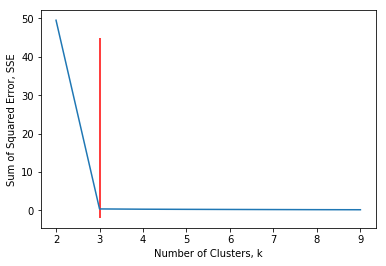

In [113]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# SSE is initialize with empty values
# n_clusters is the "k" 
sse = {}
for n_cluster1 in range(2, 10):
    kmeans1 = KMeans(n_clusters = n_cluster1, max_iter = 500).fit(se_grouped_clustering)
    se_grouped_clustering["clusters"] = kmeans1.labels_
    
    # The inertia is the sum of distances of samples to their closest cluster centre
    sse[n_cluster1] = kmeans1.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters, k")
plt.ylabel("Sum of Squared Error, SSE")
# vertical line
plt.vlines(3, ymin = -2, ymax = 45, colors = 'red')
plt.show()

<b>Depending on the number of iteration (in this case, 500 iterations were used), the number of cluster, k is 3.

<b>2. Silhouette Coefficient

To find the optimal value of the number of clusters, k, the number of clusters is iterated corresponding Silhouette Coefficientis calculated for each of the k-values used. The highest Silhouette Coefficient gives the best match to its own cluster. Please see below:

In [114]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster2 in range(2, 10):
    kmeans2 = KMeans(n_clusters = n_cluster2, random_state = 0).fit(se_grouped_clustering)
    label2 = kmeans2.labels_
    sil_coeff = silhouette_score(se_grouped_clustering, label2, metric = 'euclidean')
    print("Where n_clusters = {}, the Silhouette Coefficient is {}".format(n_cluster2, sil_coeff))

Where n_clusters = 2, the Silhouette Coefficient is 0.6228086343684874
Where n_clusters = 3, the Silhouette Coefficient is 0.6618454787413641
Where n_clusters = 4, the Silhouette Coefficient is 0.6520826202080521
Where n_clusters = 5, the Silhouette Coefficient is 0.6854128867290191
Where n_clusters = 6, the Silhouette Coefficient is 0.7271608400634918
Where n_clusters = 7, the Silhouette Coefficient is 0.837002499689455
Where n_clusters = 8, the Silhouette Coefficient is 0.8691040323314135
Where n_clusters = 9, the Silhouette Coefficient is 0.9324981511688628


From the result, the high the n_clusters the better the silhouette coefficient. For this project, a cluster value of 5 will be used.

In [115]:
se_clusters.columns

Index(['Location', 'Borough', 'Postcode', 'Latitude', 'Longitude',
       'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [116]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(se_clusters['Latitude'], se_clusters['Longitude'], se_clusters['Location'], se_clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

display(map_clusters)

<b> Cluster 1

In [117]:
se_clusters.loc[se_clusters['Cluster Labels'] == 0, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Lewisham,0,Grocery Store,Pub,Park,Café,Coffee Shop,Italian Restaurant,Gym / Fitness Center,Indian Restaurant,Train Station,Supermarket
19,Lewisham,0,Grocery Store,Pub,Park,Café,Coffee Shop,Italian Restaurant,Gym / Fitness Center,Indian Restaurant,Train Station,Supermarket
26,Lewisham,0,Grocery Store,Park,Supermarket,Café,Pub,Coffee Shop,Italian Restaurant,Fast Food Restaurant,Gas Station,Fried Chicken Joint
29,Croydon,0,Pub,Grocery Store,Park,Supermarket,Coffee Shop,Café,Platform,Tram Station,African Restaurant,Fast Food Restaurant
31,Croydon,0,Pub,Grocery Store,Park,Supermarket,Coffee Shop,Café,Platform,Tram Station,African Restaurant,Fast Food Restaurant
32,Lewisham,0,Grocery Store,Park,Supermarket,Café,Pub,Coffee Shop,Italian Restaurant,Fast Food Restaurant,Gas Station,Fried Chicken Joint
44,Lewisham,0,Grocery Store,Park,Supermarket,Café,Pub,Coffee Shop,Italian Restaurant,Fast Food Restaurant,Gas Station,Fried Chicken Joint
45,Lewisham,0,Grocery Store,Pub,Park,Café,Coffee Shop,Italian Restaurant,Gym / Fitness Center,Indian Restaurant,Train Station,Supermarket


<b> Clusters 2

In [118]:
se_clusters.loc[se_clusters['Cluster Labels'] == 1, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Southwark,1,Café,Coffee Shop,Park,Pub,Italian Restaurant,Cocktail Bar,Middle Eastern Restaurant,Bar,Grocery Store,Indian Restaurant
4,Southwark,1,Pub,Café,Coffee Shop,Pizza Place,Park,Italian Restaurant,Gastropub,Mediterranean Restaurant,Platform,Garden Center
13,Lambeth,1,Coffee Shop,Pub,Café,Cocktail Bar,Market,Pizza Place,Restaurant,Caribbean Restaurant,Brewery,Park
24,Southwark,1,Pub,Café,Coffee Shop,Pizza Place,Park,Bar,Italian Restaurant,Art Gallery,Gastropub,Burger Joint
27,Southwark,1,Pub,Café,Coffee Shop,Pizza Place,Park,Bar,Italian Restaurant,Art Gallery,Gastropub,Burger Joint
41,Lambeth,1,Café,Coffee Shop,Park,Pub,Italian Restaurant,Cocktail Bar,Middle Eastern Restaurant,Bar,Grocery Store,Indian Restaurant
43,Southwark,1,Café,Coffee Shop,Park,Pub,Italian Restaurant,Cocktail Bar,Middle Eastern Restaurant,Bar,Grocery Store,Indian Restaurant


<b> Cluster 3

In [119]:
se_clusters.loc[se_clusters['Cluster Labels'] == 2, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Southwark,2,Café,Pub,Coffee Shop,Hotel,Theater,Italian Restaurant,Park,Pizza Place,Street Food Gathering,Cocktail Bar
6,Southwark,2,Café,Pub,Coffee Shop,Hotel,Theater,Italian Restaurant,Park,Pizza Place,Street Food Gathering,Cocktail Bar
7,Southwark,2,Café,Pub,Coffee Shop,Hotel,Theater,Italian Restaurant,Park,Pizza Place,Street Food Gathering,Cocktail Bar
8,Southwark,2,Coffee Shop,Hotel,Pub,Italian Restaurant,Theater,Cocktail Bar,Scenic Lookout,Restaurant,Burger Joint,Seafood Restaurant
18,Lambeth,2,Coffee Shop,Hotel,Pub,Italian Restaurant,Theater,Cocktail Bar,Scenic Lookout,Restaurant,Burger Joint,Seafood Restaurant
22,Southwark,2,Coffee Shop,Pub,Café,Italian Restaurant,Hotel,Theater,Cocktail Bar,Tapas Restaurant,Pizza Place,Street Food Gathering
23,Southwark,2,Coffee Shop,Pub,Café,Italian Restaurant,Hotel,Theater,Cocktail Bar,Tapas Restaurant,Pizza Place,Street Food Gathering
30,Southwark,2,Coffee Shop,Hotel,Pub,Italian Restaurant,Theater,Cocktail Bar,Scenic Lookout,Restaurant,Burger Joint,Seafood Restaurant


<b> Cluster 4

In [120]:
se_clusters.loc[se_clusters['Cluster Labels'] == 3, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lewisham,3,Coffee Shop,Pub,Café,Park,Gastropub,Bar,Cocktail Bar,Italian Restaurant,Indian Restaurant,Food Truck
2,Lewisham,3,Pub,Café,Coffee Shop,Bar,Park,Garden,Indie Movie Theater,Sandwich Place,Brewery,Italian Restaurant
14,Lewisham,3,Pub,Café,Gastropub,Park,Garden,Food Truck,Fish & Chips Shop,Coffee Shop,Restaurant,Gym
16,Lewisham,3,Pub,Coffee Shop,Café,Park,Gastropub,Bar,Food Truck,Fish & Chips Shop,Restaurant,Italian Restaurant
17,Lewisham,3,Pub,Coffee Shop,Café,Park,Gastropub,Bar,Food Truck,Fish & Chips Shop,Restaurant,Italian Restaurant
20,Lewisham,3,Pub,Café,Gastropub,Park,Garden,Food Truck,Fish & Chips Shop,Coffee Shop,Restaurant,Gym
21,Lewisham,3,Pub,Coffee Shop,Café,Bar,Italian Restaurant,Brewery,Gastropub,Indian Restaurant,Park,Sandwich Place
25,Lambeth,3,Café,Pub,Hotel,Park,Theater,Coffee Shop,Gay Bar,Plaza,Farmers Market,Sandwich Place
28,Southwark,3,Pub,Brewery,Park,Coffee Shop,Bar,Café,Food Truck,Vietnamese Restaurant,Beer Bar,English Restaurant
33,Lewisham,3,Coffee Shop,Pub,Café,Park,Gastropub,Bar,Cocktail Bar,Italian Restaurant,Indian Restaurant,Food Truck


<b> Cluster 5

In [121]:
se_clusters.loc[se_clusters['Cluster Labels'] == 4, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Southwark,4,Pub,Grocery Store,Café,Coffee Shop,Bakery,Park,Gym / Fitness Center,Brewery,Pizza Place,Farmers Market
9,Lewisham,4,Pub,Grocery Store,Coffee Shop,Café,Park,Gym / Fitness Center,Supermarket,Japanese Restaurant,Pizza Place,Pharmacy
10,Lambeth,4,Pub,Coffee Shop,Grocery Store,Café,Park,Bakery,Italian Restaurant,Train Station,Pharmacy,Gym / Fitness Center
11,Lambeth,4,Pub,Coffee Shop,Grocery Store,Café,Park,Bakery,Italian Restaurant,Train Station,Pharmacy,Gym / Fitness Center
15,Lewisham,4,Pub,Grocery Store,Coffee Shop,Café,Park,Gym / Fitness Center,Supermarket,Japanese Restaurant,Pizza Place,Pharmacy
35,Lambeth,4,Coffee Shop,Pub,Café,Grocery Store,Pizza Place,Park,Bakery,Gym / Fitness Center,Brewery,Indian Restaurant
36,Lambeth,4,Coffee Shop,Pub,Café,Grocery Store,Pizza Place,Park,Bakery,Gym / Fitness Center,Brewery,Indian Restaurant
37,Croydon,4,Pub,Park,Coffee Shop,Italian Restaurant,Café,Bakery,Train Station,Gastropub,Grocery Store,Breakfast Spot
39,Lewisham,4,Pub,Grocery Store,Coffee Shop,Park,Clothing Store,Italian Restaurant,Café,Bakery,Garden,Pizza Place
40,Lambeth,4,Pub,Grocery Store,Coffee Shop,Café,Bakery,Park,Gym / Fitness Center,Pharmacy,Pizza Place,Italian Restaurant


# 4. Result

<b> The following are the highlights of the 5 clusters above:

1. Pubs, Cafe, Coffee Shops are popular in the South East London.
2. As for restaurants, the Italian Restaurants are very popular in the South East London area. Especially in Southwark and Lambeth areas.
3. With the Lewisham area being the most condensed area of Africans in the South East Area, it is surprising to see how in the top 10 venues, you can barely see restaurants in the top 5 venues.
4. Although, the Clusters have variations, a very visible presence is the predominance of pubs.

# 5. Discussion and Conclusion

It is very important to note that Clusters 2 and 3 are the most viable clusters to create a brand African Restaurant. Their proximity to other amenities and accessibility to station are paramount. These 2 clusters do not have top restaurants that could rival their standards if they are created. And the proximity to resources needed is paramount as Lewisham and Lambeth are not far out from Peckham (under Southwark).

In conclusion, this project would have had better results if there were more data in terms of crime data within the area, traffic access and allowance of more venues exploration with the Foursquare (limited venues for free calls).

Also, getting the ratings and feedbacks of the current restaurants within the clusters would have helped in providing more insight into the best location.